# 2021 Tokyo Summer Olympics Dataset Exploration

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [41]:
tok = pd.read_csv('../datasets/Tokyo 2021 dataset.csv')

In [42]:
tok.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC


In [43]:
tok.info

<bound method DataFrame.info of     Rank                    Team/NOC  Gold Medal  Silver Medal  Bronze Medal  \
0      1    United States of America          39            41            33   
1      2  People's Republic of China          38            32            18   
2      3                       Japan          27            14            17   
3      4               Great Britain          22            21            22   
4      5                         ROC          20            28            23   
..   ...                         ...         ...           ...           ...   
88    86                       Ghana           0             0             1   
89    86                     Grenada           0             0             1   
90    86                      Kuwait           0             0             1   
91    86         Republic of Moldova           0             0             1   
92    86        Syrian Arab Republic           0             0             1   

    Tot

In [44]:
tok.isnull().sum()

Rank             0
Team/NOC         0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank by Total    0
NOCCode          0
dtype: int64

In [45]:
tok = tok.rename(columns=str.lower)

In [77]:
tok['team/noc'].tail(50)

43                 Ukraine
44                 Belarus
45                 Romania
46               Venezuela
47                   India
48        Hong Kong, China
49             Philippines
50                Slovakia
51            South Africa
52                 Austria
53                   Egypt
54               Indonesia
55                Ethiopia
56                Portugal
57                 Tunisia
58                 Estonia
59                    Fiji
60                  Latvia
61                Thailand
62                 Bermuda
63                 Morocco
64             Puerto Rico
65                Colombia
66              Azerbaijan
67      Dominican Republic
68                 Armenia
69              Kyrgyzstan
70                Mongolia
71               Argentina
72              San Marino
73                  Jordan
74                Malaysia
75                 Nigeria
76                 Bahrain
77            Saudi Arabia
78               Lithuania
79         North Macedonia
8

In [98]:
teams = ['United States of America', 'Peoples Republic of China', 'Japan', 'Great Britain', 'ROC', 
    'Australia', 'Netherlands', 'France','Germany','Italy','Canada', 'Brazil','New Zealand', 'Cuba',
    'Hungary','Republic of Korea','Poland','Czech Republic','Kenya','Norway','Jamaica','Spain','Sweden',
    'Switzerland','Denmark','Croatia', 'Islamic Republic of Iran', 'Serbia','Belgium','Bulgaria', 'Slovenia',
    'Uzbekistan','Georgia', 'Chinese Taipei','Turkey','Greece','Uganda','Ecuador','Ireland','Israel','Qatar',
    'Bahamas','Kosovo','Ukraine','Belarus','Romania','Venezuela','India','Hong Kong, China', 'Philippines',
    'Slovakia', 'South Africa', 'Austria', 'Egypt','Indonesia','Ethiopia','Portugal','Tunisia','Estonia',                   'Fiji',
    'Latvia','Thailand','Bermuda','Morocco','Puerto Rico','Colombia','Azerbaijan','Dominican Republic', 'Armenia',
    'Kyrgyzstan','Mongolia','Argentina','San Marino', 'Jordan','Malaysia', 'Nigeria','Bahrain','Saudi Arabia',
    'Lithuania','North Macedonia','Namibia','Turkmenistan','Kazakhstan','Mexico','Finland','Botswana','Burkina Faso',
    'Côte dIvoire','Ghana','Grenada','Kuwait','Republic of Moldova','Syrian Arab Republic']

In [111]:
gold = [39, 38, 27, 22, 20, 17, 10, 10, 10, 10, 7, 7, 7, 7, 6, 6, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

silver = [41, 32, 14, 21, 28, 7, 12, 12, 11, 10, 6, 6, 6, 3, 7, 4, 5, 4, 4, 2, 1, 8, 6, 4, 4, 3, 2, 1, 1, 1, 1, 0, 5, 4, 2,
         1, 1, 1, 0, 0, 0, 0, 0, 6, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 3, 3, 2, 2, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [112]:
gold_m = gold
silver_m = silver
bronze_m = tok['bronze medal']
index = tok['team/noc']

In [117]:
medals = pd.DataFrame({'gold medals' : gold_m,}, index=teams)

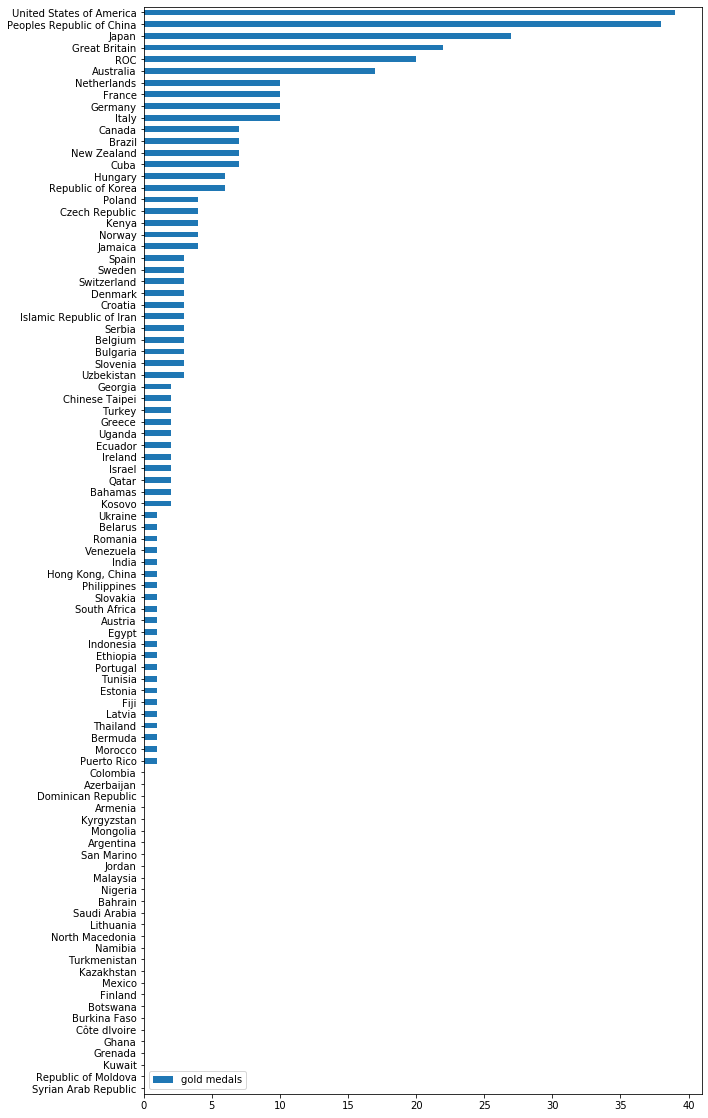

In [118]:
ax = medals.plot.barh(figsize = (10, 20))
plt.gca().invert_yaxis()